<a href="https://colab.research.google.com/github/edenlum/projecteuler/blob/main/Laserbeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Idea:
Tile the plain with triangles. Instead tracking the laserbeam and fliping it when reaching a wall, flip the "world" and the laserbeam will continue straight.

In the picture we see the blue dots as vertex C. We use coordinates $(x,y)$ where $x$ goes to the right and up, and $y$ goes to the left and up.

The number of bounces is equal to the number of intersections with lines which is equal to $2(x+y)-3$.

Vertex C is on coordinates $(x,y) = (y+3n, y)$.

We also need $\gcd(x,y) = 1$ so we will not hit a vertex before reaching the target vertex.


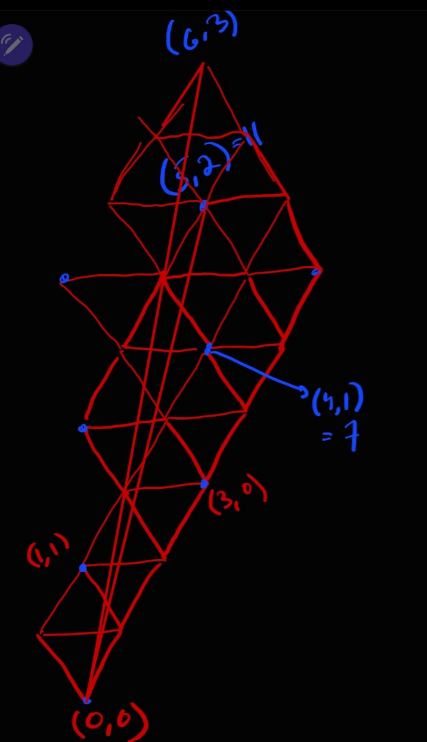

Equations:

1. $2(x+y)-3 = N$

2. $\gcd(x, y) = 1$

3. $x = y + 3n$

We can change equation 1 to:
1. $x+y = (N+3)/2$

Notice that $\gcd(x, y) = 1$ implies $\gcd(x, x+y) = 1$, and we can simply check that by finding the prime factors for $x+y$ and checking if $x$ is divisible by one of them.

Because $x-y = 3n$ then we can jump by 3 when checking possible candidates


In [4]:
import numpy as np
import sympy as sp

N = 1000001

def solve(N):
    # find the first y that is a candidate
    for i in range(3):
        if ((N+3)//2 - 2*i) % 3 == 0:
            start = i
            print(i)
            break
    candidates = np.arange(start, (N+3)//4, 3)
    prime_factors = sp.primefactors((N+3)//2)
    print(prime_factors)

    for p in prime_factors:
        print(len(candidates))
        candidates[candidates % p == 0] = 0

    return len(candidates[candidates != 0])

solve(N)

2
[2, 53, 89]
83333
83333
83333


40420

In [6]:
# another approach - more naive
def solve2(N):
    # find the first y that is a candidate
    for i in range(3):
        if ((N+3)//2 - 2*i) % 3 == 0:
            start = i
            print(i)
            break

    prime_factors = sp.primefactors((N+3)//2)
    cnt = 0
    for i in range(start, (N+3)//4, 3):
        for p in prime_factors:
            if i % p == 0:
                break
        else:
            cnt += 1
    return cnt

solve2(N)

2


40420

In [7]:
import signal

# Define the timeout handler
def timeout_handler(signum, frame):
    raise TimeoutError("Code took too long")

# Set the signal alarm
def run_with_timeout(func, args, timeout):
    # Set the alarm signal and the handler
    signal.signal(signal.SIGALRM, timeout_handler)
    signal.alarm(timeout)  # timeout in seconds
    try:
        result = func(*args)
    finally:
        # Cancel the alarm after function completes or raises an error
        signal.alarm(0)
    return result

def my_long_running_function(x):
    # Replace the following with your actual long-running code
    import time
    time.sleep(x)  # Simulate long running process
    return "Finished"

# Usage


In [8]:
N = 12017639147
try:
    result = run_with_timeout(solve, (N,), 10)  # args must be a tuple
    print(result)
except TimeoutError as e:
    print(e)


2
Code took too long


Both approaches take too long. We need to find the number of solutions (x,y), but not what those solutions are. Instead of listing all candidates and removing the ones that fail the conditions, we can keep a count on how many candidates and subtract/add from that.

We start with the candidates $\text{range}(s, t//2, 3)$, where $t = (N+3)//2$, then we remove all candidates that are divisible by one or more factors.

Given a factor $p$, the amount of candidates that are divisble by $p$ can be calculated by finding the number of $n$s such that $np = s \mod 3$ and $np < t//2$ (which means $np \in \text{candidates}$).

If $p = 0 \mod 3$ then
- if $s=0$ the number of $n$s is $(t//2) // p$
- if $s \ne 0$ the number of $n$s is 0

If $p = 1,2 \mod 3$ then
the number of $n$s is equal to:

$ (t//2 - p_{min} ) // 3p$

where $p_{min} = s \mod 3$ and isnthe smallest multiple of $p$.

Notice that if we go over all prime factors, we will count too many, since we will remove $p_1 p_2$ twice (once when counting $p_1$ and once when counting $p_2$) so we will go over all factors and subtract/add accordingly.

In [22]:
import itertools

def mul(arr):
    ret = 1
    for x in arr:
        ret *= x
    return ret


def solve_eff(N):
    t = (N+3)//2
    prime_factors = sp.primefactors(t)
    print(prime_factors)
    # find the first y that is a candidate
    for i in range(3):
        if (t - 2*i) % 3 == 0:
            start = i
            print(i)
            break

    cnt = (t // 2 - start) // 3
    print(t, cnt)
    for i in range(1, len(prime_factors) + 1):
        sign = -1 if i % 2 == 1 else 1
        for ps in itertools.combinations(prime_factors, i):
            factor = mul(ps)
            if factor % 3 == 0:
                if start == 0:
                    change = (t // 2) // factor
                else:
                    change = 0
            else:
                a = factor % 3 # 1 or 2
                for i in range(3):
                    if (a * i % 3 == start):
                        pmin = factor * i
                        break
                change = (t // 2 - pmin) // (3* factor)
            cnt += sign * change
            print(factor, f"{'-' if sign == -1 else '+'}", change)
    return cnt

N = 12017639147
solve_eff(N)

[5, 11, 17, 23, 29, 41, 47]
2
6008819575 1001469928
5 - 200293985
11 - 91042720
17 - 58909995
23 - 43542170
29 - 34533445
41 - 24426095
47 - 21307870
55 + 18208543
85 + 11781998
115 + 8708433
145 + 6906688
205 + 4885218
235 + 4261573
187 + 5355453
253 + 3958378
319 + 3139403
451 + 2220553
517 + 1937078
391 + 2561303
493 + 2031378
697 + 1436828
799 + 1253403
667 + 1501453
943 + 1062003
1081 + 926428
1189 + 842278
1363 + 734753
1927 + 519703
935 - 1071090
1265 - 791675
1595 - 627880
2255 - 444110
2585 - 387415
1955 - 512260
2465 - 406275
3485 - 287365
3995 - 250680
3335 - 300290
4715 - 212400
5405 - 185285
5945 - 168455
6815 - 146950
9635 - 103940
4301 - 232845
5423 - 184670
7667 - 130620
8789 - 113945
7337 - 136495
10373 - 96545
11891 - 84220
13079 - 76570
14993 - 66795
21197 - 47245
11339 - 88320
16031 - 62470
18377 - 54495
20213 - 49545
23171 - 43220
32759 - 30570
27347 - 36620
31349 - 31945
44321 - 22595
55883 - 17920
21505 + 46568
27115 + 36933
38335 + 26123
43945 + 22788
36685 + 27

604501312

In [23]:
604501312 * 2

1209002624